In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, recall_score, precision_score, plot_precision_recall_curve, mean_squared_error, r2_score
import seaborn as sns
import category_encoders as ce
#import xgboost
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
np.random.seed(123)
from sklearn.model_selection import cross_val_score

import xgboost as xgb
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import metrics

In [2]:
from skopt import BayesSearchCV, plots
import warnings
warnings.filterwarnings('ignore')

In [3]:
def on_step(optim_result):
    score = bsc.best_score_
    print("best score: %s" % score)
    return


In [4]:
encoder = ce.OneHotEncoder()

X = pd.read_csv("students-all.csv").iloc[:,1:]
y = X.romantic
X = X.drop("romantic", axis =1)

encoder.fit(X)
X = encoder.transform(X)

In [5]:
xgb_model = xgb.XGBClassifier()
extra_trees_model = ExtraTreesClassifier()

xgb_params = {
                "max_depth"         : np.arange(3,100),
                "learning_rate"     : np.arange(0.001,1,0.001, dtype = "float64"),
                "booster"           : ["gbtree","gblinear","dart"],
                "subsample"         : np.arange(0.1,1,0.1, dtype = "float64"),
                "colsample_bytree"  : np.arange(0.1,1,0.1, dtype = "float64"),
                "reg_alpha"         : np.arange(0,10,0.1, dtype = "float64"),
                "reg_lambda"        : np.arange(0,10,0.1, dtype = "float64")
}

extra_params = {
                    "min_samples_split" : np.arange(2,20,1),
                    "min_samples_leaf"  : np.arange(1,20,1),
                    "bootstrap" : [False,True],
                    "ccp_alpha" :  np.arange(0,10, 0.1)
                }




In [19]:
bsc = BayesSearchCV(extra_trees_model, extra_params, n_iter = 100, cv = 5)
bsc.fit(X,y, callback = on_step)


best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best score: 0.6446360153256705
best sco

BayesSearchCV(cv=5, error_score='raise',
              estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                             class_weight=None,
                                             criterion='gini', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=N...
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.

In [8]:
bsc = BayesSearchCV(xgb_model, xgb_params, n_iter = 200, cv = 5)
bsc.fit(X,y, callback = on_step)


best score: 0.6283524904214559
best score: 0.6724137931034483
best score: 0.6724137931034483
best score: 0.6724137931034483
best score: 0.6724137931034483
best score: 0.6724137931034483
best score: 0.6772030651340997
best score: 0.6772030651340997
best score: 0.6772030651340997
best score: 0.6772030651340997
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.6886973180076629
best score: 0.7078544061302682
best score: 0.7078544061302682
best score: 0.7078544061302682
best score: 0.7078544061302682
best score: 0.7078544061302682
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best score: 0.7327586206896551
best sco

BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBClassifier(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_...
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 

In [9]:
bsc.best_params_

OrderedDict([('booster', 'dart'),
             ('colsample_bytree', 0.9),
             ('learning_rate', 0.461),
             ('max_depth', 47),
             ('reg_alpha', 0.0),
             ('reg_lambda', 1.1),
             ('subsample', 0.6)])

In [9]:
xgb_model = xgb.XGBClassifier()
xgb_model.load_model('alco.model')

In [15]:
df = pd.read_csv("students-all.csv")
# remove rownames
df = df.iloc[:,1:]

encoder = ce.OneHotEncoder()

df = pd.read_csv("students-all.csv").iloc[:,1:]
y = df.romantic
df = df.drop("romantic", axis =1)

df_one_hot = encoder.fit_transform(df)

target = np.where(y=='yes', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(df_one_hot,
                                                    target, test_size = 0.2, random_state = 666)

In [16]:
y_predict_prob = xgb_model.predict_proba(X_test)[:,1]
y_pres = xgb_model.predict(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict_prob)

0.8041666666666667

[Text(0, 0, 'guardian_3'),
 Text(0, 0, 'schoolsup_1'),
 Text(0, 0, 'Fjob_5'),
 Text(0, 0, 'guardian_2'),
 Text(0, 0, 'Walc'),
 Text(0, 0, 'Mjob_2'),
 Text(0, 0, 'nursery_1'),
 Text(0, 0, 'age'),
 Text(0, 0, 'Mjob_5'),
 Text(0, 0, 'sex_1'),
 Text(0, 0, 'internet_1'),
 Text(0, 0, 'school_2'),
 Text(0, 0, 'reason_3'),
 Text(0, 0, 'Fjob_4'),
 Text(0, 0, 'Pstatus_1'),
 Text(0, 0, 'failures'),
 Text(0, 0, 'nursery_2'),
 Text(0, 0, 'famsup_1'),
 Text(0, 0, 'studytime'),
 Text(0, 0, 'reason_2'),
 Text(0, 0, 'traveltime'),
 Text(0, 0, 'famrel'),
 Text(0, 0, 'goout'),
 Text(0, 0, 'freetime'),
 Text(0, 0, 'G3'),
 Text(0, 0, 'Medu'),
 Text(0, 0, 'Fedu'),
 Text(0, 0, 'Mjob_1'),
 Text(0, 0, 'activities_2'),
 Text(0, 0, 'Fjob_1'),
 Text(0, 0, 'higher_1'),
 Text(0, 0, 'major_1'),
 Text(0, 0, 'health'),
 Text(0, 0, 'Pstatus_2'),
 Text(0, 0, 'paid_1'),
 Text(0, 0, 'absences'),
 Text(0, 0, 'G1'),
 Text(0, 0, 'reason_4'),
 Text(0, 0, 'address_1'),
 Text(0, 0, 'activities_1'),
 Text(0, 0, 'Dalc'),
 Text(0,

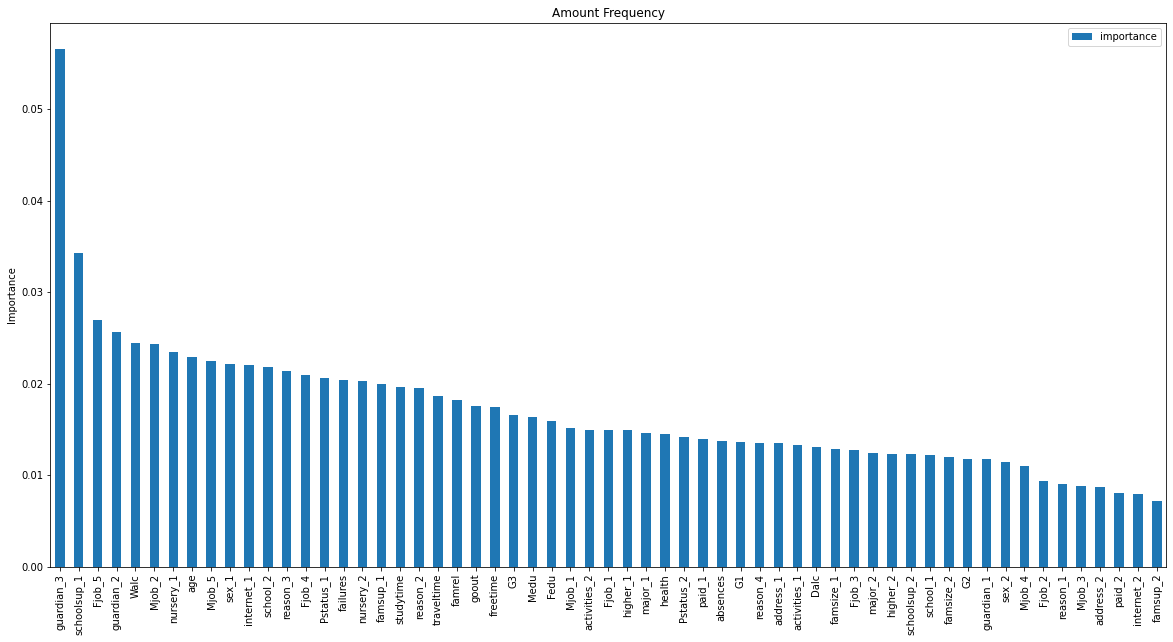

In [17]:
sorted_idx = np.argsort(xgb_model.feature_importances_)[::-1]
names = []
val = []
for index in sorted_idx:
    names.append(X_train.columns[index])
    val.append(xgb_model.feature_importances_[index])

d = pd.DataFrame({'feature':names, 'importance': val})
plt.rcParams['figure.figsize'] = [20, 10]
ax = d.plot(kind='bar', label = names)
ax.set_title('Amount Frequency')
ax.set_xlabel('')
ax.set_ylabel('Importance')
ax.set_xticklabels(names)